<a href="https://colab.research.google.com/github/WanderingVector/USCensus2020/blob/main/BigQuery_bquxjob_7ed91357_18be46f5c69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'iowa-liquor-sales-405513' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=iowa-liquor-sales-405513:US:bquxjob_7ed91357_18be46f5c69)
back to BigQuery to edit the query within the BigQuery user interface.

In [3]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7ed91357_18be46f5c69') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` 



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7ed91357_18be46f5c69') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S08765300058,2012-11-05,2627,HY-VEE WINE AND SPIRITS #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT(-93.65129 41.626668),77,POLK,...,44662,LADY BLIGH CHERRY RUM,12,1000,7.00,10.50,4,42.00,4.0,1.06
1,INV-00779300089,2016-10-06,5162,URBANDALE LIQUOR,"6401, DOUGLAS AVE",URBANDALE,50322,POINT(-93.705732 41.629411),77,POLK,...,65257,JAGERMEISTER LIQUEUR,12,1000,15.96,23.94,4,93.24,4.0,1.06
2,S25352000001,2015-04-28,3700,AVOCA LIQUOR,158 SOUTH ELM,AVOCA,51521,POINT(-95.339412 41.476306),78,POTTAWATTAMIE,...,67557,KAMORA COFFEE LIQUEUR,12,1000,8.39,12.59,4,50.36,4.0,1.06
3,INV-02020200005,2016-12-07,4228,FAREWAY STORES #462 / VINTON,501 A AVE,VINTON,52349,POINT(-92.025603 42.166166),6,BENTON,...,43336,CAPTAIN MORGAN ORIGINAL SPICED,12,750,9.06,13.59,240,3261.60,180.0,47.55
4,INV-17767000158,2019-02-25,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320,POINT(-93.596754 41.554101),77,POLK,...,89447,LA PRIMA TEQUILA/GOLD,12,1000,7.67,11.51,84,966.84,84.0,22.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711023,S30613400064,2016-02-09,2649,HY-VEE #3 / DUBUQUE,400 LOCUST ST,DUBUQUE,52001,POINT(-90.666497 42.497219),31,DUBUQUE,...,32237,SEAGRAMS EXTRA DRY GIN,12,1000,7.49,11.24,2,22.48,2.0,0.53
27711024,INV-08949500007,2017-12-01,3826,LAKESIDE HOTEL & CASINO,777 CASINO DR,OSCEOLA,50213,POINT(-93.797561 41.040078),20,CLARKE,...,67527,KAHLUA COFFEE LIQUEUR,12,1000,14.99,22.49,2,44.98,2.0,0.53
27711025,S21155000031,2014-09-10,3819,QUILLINS DECORAH,915 SHORT ST,DECORAH,52101,POINT(-91.797771 43.291023),96,WINNESHIEK,...,23827,FIVE STAR,12,1000,4.40,6.60,2,13.20,2.0,0.53
27711026,S32644800001,2016-06-01,4921,MARKET EXPRESS,5340 16TH AVE SW,CEDAR RAPIDS,52404,POINT(-91.739906 41.963888),57,LINN,...,37993,SMIRNOFF VODKA 80 PRF,48,200,2.54,3.81,10,38.10,2.0,0.53


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [5]:
results.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,27711028.0,27711028.0,2.771102e+07,2.771102e+07,27711028.0,2.771102e+07,2.771103e+07,2.771103e+07
mean,12.155566,881.964761,1.054191e+01,1.582339e+01,10.766961,1.438071e+02,9.161458e+00,2.417599e+00
std,7.746083,629.341013,1.199210e+01,1.798681e+01,30.258566,5.059222e+02,3.600398e+01,9.511347e+00
min,1.0,0.0,0.000000e+00,0.000000e+00,-648.0,-9.720000e+03,-6.480000e+02,-1.711800e+02
25%,6.0,750.0,5.540000e+00,8.400000e+00,3.0,3.450000e+01,1.500000e+00,4.000000e-01
50%,12.0,750.0,8.330000e+00,1.251000e+01,6.0,7.650000e+01,4.800000e+00,1.260000e+00
75%,12.0,1000.0,1.296000e+01,1.944000e+01,12.0,1.485600e+02,1.050000e+01,2.770000e+00
max,336.0,378000.0,1.843600e+04,2.765400e+04,15000.0,2.795573e+05,1.500000e+04,3.962580e+03


## The above describes the summary statistics of numeric dataframe , by calculating some statistical data like percentile, mean and standard deviation of the numerical values of the dataframe.

In [6]:
df=results

In [7]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [8]:
# Display the first few rows of the DataFrame
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S08765300058,2012-11-05,2627,HY-VEE WINE AND SPIRITS #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT(-93.65129 41.626668),77,POLK,...,44662,LADY BLIGH CHERRY RUM,12,1000,7.00,10.50,4,42.00,4.0,1.06
1,INV-00779300089,2016-10-06,5162,URBANDALE LIQUOR,"6401, DOUGLAS AVE",URBANDALE,50322,POINT(-93.705732 41.629411),77,POLK,...,65257,JAGERMEISTER LIQUEUR,12,1000,15.96,23.94,4,93.24,4.0,1.06
2,S25352000001,2015-04-28,3700,AVOCA LIQUOR,158 SOUTH ELM,AVOCA,51521,POINT(-95.339412 41.476306),78,POTTAWATTAMIE,...,67557,KAMORA COFFEE LIQUEUR,12,1000,8.39,12.59,4,50.36,4.0,1.06
3,INV-02020200005,2016-12-07,4228,FAREWAY STORES #462 / VINTON,501 A AVE,VINTON,52349,POINT(-92.025603 42.166166),6,BENTON,...,43336,CAPTAIN MORGAN ORIGINAL SPICED,12,750,9.06,13.59,240,3261.60,180.0,47.55
4,INV-17767000158,2019-02-25,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320,POINT(-93.596754 41.554101),77,POLK,...,89447,LA PRIMA TEQUILA/GOLD,12,1000,7.67,11.51,84,966.84,84.0,22.19


## DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

### Perform Data Preparation and Cleaning
### Load dataset into dataframe using Pandas
### Explore number of columns, rows, ranges of values
### Handle missing, incorrect and invalid data
### Perform any additional additional steps
### Load dataset into dataframe using Pandas

In [9]:
# List of columns in the dataset
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [10]:
# Column information
df.info

<bound method DataFrame.info of          invoice_and_item_number        date store_number  \
0                   S08765300058  2012-11-05         2627   
1                INV-00779300089  2016-10-06         5162   
2                   S25352000001  2015-04-28         3700   
3                INV-02020200005  2016-12-07         4228   
4                INV-17767000158  2019-02-25         2633   
...                          ...         ...          ...   
27711023            S30613400064  2016-02-09         2649   
27711024         INV-08949500007  2017-12-01         3826   
27711025            S21155000031  2014-09-10         3819   
27711026            S32644800001  2016-06-01         4921   
27711027            S32649500032  2016-06-02         5037   

                            store_name                         address  \
0           HY-VEE WINE AND SPIRITS #1  3424 MARTIN LUTHER KING JR PKW   
1                     URBANDALE LIQUOR               6401, DOUGLAS AVE   
2            

# Wrangle the dataset- Handle missing, incorrect and invalid data

In [11]:
# Percentage missing values per column
missing_percentages = df.isna().sum() .sort_values(ascending=False) / len(df) * 100
missing_percentages

county_number              12.912495
store_location              9.014440
county                      0.576998
zip_code                    0.300083
address                     0.299845
city                        0.299841
category_name               0.090361
category                    0.061254
sale_dollars                0.000036
state_bottle_retail         0.000036
state_bottle_cost           0.000036
vendor_number               0.000032
vendor_name                 0.000025
bottle_volume_ml            0.000000
volume_sold_liters          0.000000
bottles_sold                0.000000
invoice_and_item_number     0.000000
pack                        0.000000
item_description            0.000000
item_number                 0.000000
date                        0.000000
store_name                  0.000000
store_number                0.000000
volume_sold_gallons         0.000000
dtype: float64

## The above shows the percentage of missing values per column.

In [12]:
# Return missing value percentages not equal to zero
missing_percentages[missing_percentages != 0]

county_number          12.912495
store_location          9.014440
county                  0.576998
zip_code                0.300083
address                 0.299845
city                    0.299841
category_name           0.090361
category                0.061254
sale_dollars            0.000036
state_bottle_retail     0.000036
state_bottle_cost       0.000036
vendor_number           0.000032
vendor_name             0.000025
dtype: float64

## The above returns missing value percentage of columns that are not equal to 0.

Let’s remove missing values

In [13]:
# Keep the datafram with valid entries in the same variable.
df.dropna(inplace=True)
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S08765300058,2012-11-05,2627,HY-VEE WINE AND SPIRITS #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT(-93.65129 41.626668),77,POLK,...,44662,LADY BLIGH CHERRY RUM,12,1000,7.00,10.50,4,42.00,4.0,1.06
1,INV-00779300089,2016-10-06,5162,URBANDALE LIQUOR,"6401, DOUGLAS AVE",URBANDALE,50322,POINT(-93.705732 41.629411),77,POLK,...,65257,JAGERMEISTER LIQUEUR,12,1000,15.96,23.94,4,93.24,4.0,1.06
2,S25352000001,2015-04-28,3700,AVOCA LIQUOR,158 SOUTH ELM,AVOCA,51521,POINT(-95.339412 41.476306),78,POTTAWATTAMIE,...,67557,KAMORA COFFEE LIQUEUR,12,1000,8.39,12.59,4,50.36,4.0,1.06
3,INV-02020200005,2016-12-07,4228,FAREWAY STORES #462 / VINTON,501 A AVE,VINTON,52349,POINT(-92.025603 42.166166),6,BENTON,...,43336,CAPTAIN MORGAN ORIGINAL SPICED,12,750,9.06,13.59,240,3261.60,180.0,47.55
4,INV-17767000158,2019-02-25,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320,POINT(-93.596754 41.554101),77,POLK,...,89447,LA PRIMA TEQUILA/GOLD,12,1000,7.67,11.51,84,966.84,84.0,22.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711023,S30613400064,2016-02-09,2649,HY-VEE #3 / DUBUQUE,400 LOCUST ST,DUBUQUE,52001,POINT(-90.666497 42.497219),31,DUBUQUE,...,32237,SEAGRAMS EXTRA DRY GIN,12,1000,7.49,11.24,2,22.48,2.0,0.53
27711024,INV-08949500007,2017-12-01,3826,LAKESIDE HOTEL & CASINO,777 CASINO DR,OSCEOLA,50213,POINT(-93.797561 41.040078),20,CLARKE,...,67527,KAHLUA COFFEE LIQUEUR,12,1000,14.99,22.49,2,44.98,2.0,0.53
27711025,S21155000031,2014-09-10,3819,QUILLINS DECORAH,915 SHORT ST,DECORAH,52101,POINT(-91.797771 43.291023),96,WINNESHIEK,...,23827,FIVE STAR,12,1000,4.40,6.60,2,13.20,2.0,0.53
27711026,S32644800001,2016-06-01,4921,MARKET EXPRESS,5340 16TH AVE SW,CEDAR RAPIDS,52404,POINT(-91.739906 41.963888),57,LINN,...,37993,SMIRNOFF VODKA 80 PRF,48,200,2.54,3.81,10,38.10,2.0,0.53


In [14]:
missing_percentages = df.isna().sum() .sort_values(ascending=False) / len(df) * 100
missing_percentages

invoice_and_item_number    0.0
date                       0.0
volume_sold_liters         0.0
sale_dollars               0.0
bottles_sold               0.0
state_bottle_retail        0.0
state_bottle_cost          0.0
bottle_volume_ml           0.0
pack                       0.0
item_description           0.0
item_number                0.0
vendor_name                0.0
vendor_number              0.0
category_name              0.0
category                   0.0
county                     0.0
county_number              0.0
store_location             0.0
zip_code                   0.0
city                       0.0
address                    0.0
store_name                 0.0
store_number               0.0
volume_sold_gallons        0.0
dtype: float64

## Columns and rows with missing values has been dropped, keeping only dataframes with valid entries. There are no more missing values.

The columns with the dollar sign have been renamed.

Let’s remove dollar sign from the following columns; Sales(Dollars), State Bottle Cost and State Bottle Retail.

We need to view the data types of those 3 columns

In [15]:
# Rename multiple column names by label
df.rename(columns={'sale_dollars':'Sales', 'state_bottle_cost': 'State Bottle Cost', 'state_bottle_retail': 'State Bottle Retail', 'county_number' :'County Id',' vendor_name': 'Vendor', 'state_bottle_cost': 'State Bottle Cost', 'bottles_sold' : 'Bottles Sold', 'store_name':'Store Name'}, inplace=True)
print(df.columns)

Index(['invoice_and_item_number', 'date', 'store_number', 'Store Name',
       'address', 'city', 'zip_code', 'store_location', 'County Id', 'county',
       'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sales',
       'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')


In [16]:
df.Sales.head()

0      42.00
1      93.24
2      50.36
3    3261.60
4     966.84
Name: Sales, dtype: float64

In [17]:
# View datatype
df.dtypes
# All 3 coloumns are in float type with no $ signs

invoice_and_item_number     object
date                        dbdate
store_number                object
Store Name                  object
address                     object
city                        object
zip_code                    object
store_location              object
County Id                   object
county                      object
category                    object
category_name               object
vendor_number               object
vendor_name                 object
item_number                 object
item_description            object
pack                         Int64
bottle_volume_ml             Int64
State Bottle Cost          float64
State Bottle Retail        float64
Bottles Sold                 Int64
Sales                      float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

# Numerical Analysis and Visualization

# Compute mean and standard deviation

*The following numeric columns will be analyzed;

Sales

State Bottle Cost

State Bottle Retail


In [18]:
# Compute mean of sales column
df.Sales.mean()

141.1801458609334

## To define correlation, you need mean, standard deviation and sample co-variance.

In [19]:
# Compute standard deviation of sales column
df.Sales.std()

501.52260394481937

## The standard deviation is calculated as the square root of variance by determining each data point’s deviation relative to the mean.

In [20]:
# Compute mean of state bottle cost column
df['State Bottle Cost'].mean()

10.215515373265754

In [21]:
# Compute standard deviation of state bottle cost column
df['State Bottle Cost'].std()

10.822225366519453

In [22]:
# Compute mean of state bottle retail column
df['State Bottle Retail'].mean()

15.33541552761785

In [23]:
# Compute the standard deviation of state bottle retail column
df['State Bottle Retail'].std()

16.23253459242276

# Let’s create a new column ‘Profit’

In [34]:
# Create column for profit

df['State Bottle Cost'] = pd.to_numeric(df['State Bottle Cost'], errors='coerce')
df['State Bottle Retail'] = pd.to_numeric(df['State Bottle Retail'], errors='coerce')

# Create a new column 'Profit'
df['Profit'] = df['State Bottle Retail'] - df['State Bottle Cost']

# Display the DataFrame with the new 'Profit' column
df.head()


,invoice_and_item_number,date,store_number,Store Name,address,city,zip_code,store_location,County Id,county,...,item_description,pack,bottle_volume_ml,State Bottle Cost,State Bottle Retail,Bottles Sold,Sales,volume_sold_liters,volume_sold_gallons,Profit
0,S08765300058,2012-11-05,2627,HY-VEE WINE AND SPIRITS #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT(-93.65129 41.626668),77,POLK,...,LADY BLIGH CHERRY RUM,12,1000,7.00,10.50,4,42.00,4.0,1.06,3.50
1,INV-00779300089,2016-10-06,5162,URBANDALE LIQUOR,"6401, DOUGLAS AVE",URBANDALE,50322,POINT(-93.705732 41.629411),77,POLK,...,JAGERMEISTER LIQUEUR,12,1000,15.96,23.94,4,93.24,4.0,1.06,7.98
2,S25352000001,2015-04-28,3700,AVOCA LIQUOR,158 SOUTH ELM,AVOCA,51521,POINT(-95.339412 41.476306),78,POTTAWATTAMIE,...,KAMORA COFFEE LIQUEUR,12,1000,8.39,12.59,4,50.36,4.0,1.06,4.20
3,INV-02020200005,2016-12-07,4228,FAREWAY STORES #462 / VINTON,501 A AVE,VINTON,52349,POINT(-92.025603 42.166166),6,BENTON,...,CAPTAIN MORGAN ORIGINAL SPICED,12,750,9.06,13.59,240,3261.60,180.0,47.55,4.53
4,INV-17767000158,2019-02-25,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320,POINT(-93.596754 41.554101),77,POLK,...,LA PRIMA TEQUILA/GOLD,12,1000,7.67,11.51,84,966.84,84.0,22.19,3.84


In [35]:
# Derive Profit from ( Sales, State Bottle Cost, State Bottle Retail
df['Profit'] - df['Sales'] - df['State Bottle Cost']

0            -45.50
1           -101.22
2            -54.55
3          -3266.13
4           -970.67
             ...   
27711023     -26.22
27711024     -52.47
27711025     -15.40
27711026     -39.37
27711027     -54.39
Length: 21801451, dtype: float64

## Compute correlation between Sales and Profit

In [36]:
# Compute correlation between Sales and Profit
df['Sales'].corr(df['Profit'])

0.09994164986932957

# The correlation between the features Sales and Profit is around 0.999. The number is closer to 1, which means these two features are highly correlated.

# Explore relationship between columns

## The following columns will be explored;

State Bottle Cost

State Bottle Retail

Sales

Profit

*   Correlations
*  Scatterplots


*   Pair Plots
*  Categorical Plots



In [42]:
# Explore the relationship between columns
df_corr = df[['State Bottle Cost', 'State Bottle Retail', 'Sales', 'Profit']].corr()
df_corr


,State Bottle Cost,State Bottle Retail,Sales,Profit
State Bottle Cost,1.000000,0.999943,0.099898,0.999486
State Bottle Retail,0.999943,1.000000,0.099924,0.999772
Sales,0.099898,0.099924,1.000000,0.099942
Profit,0.999486,0.999772,0.099942,1.000000


<Axes: >

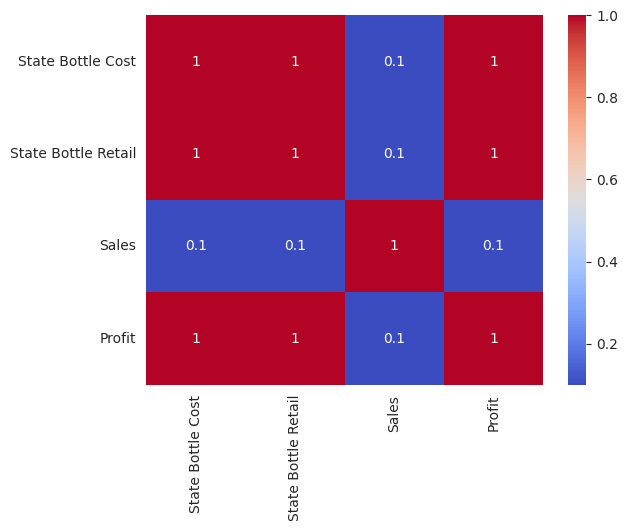

In [43]:
# Explore relationships with heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

# Insights:
### From the correlation heatmap, we can see that there is a positive correlation between Sales and Profit. In order words, as Sales increases Profit also increases.

# Positive Correlation

When two variables in a dataset increase or decrease together, then it is known as a positive correlation. A positive correlation is denoted by 1

<ipython-input-44-678ead874c7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


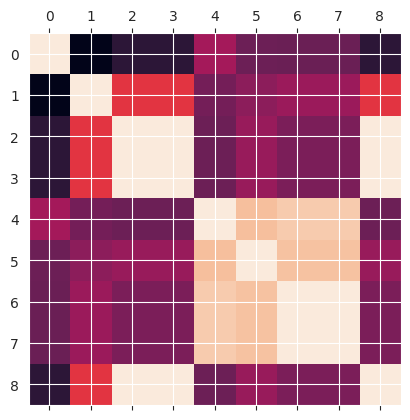

In [44]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png")

# This will save the image in the working directory.
#If you don't know what this directory is the next line will show you how to check

<ipython-input-64-57cc3f50b556>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.matshow(df_corr, fignum=f.number, cmap=plt.cm.get_cmap('YlOrRd', 3))  # Use 'YlOrRd' colormap for salmon, yellow, and red


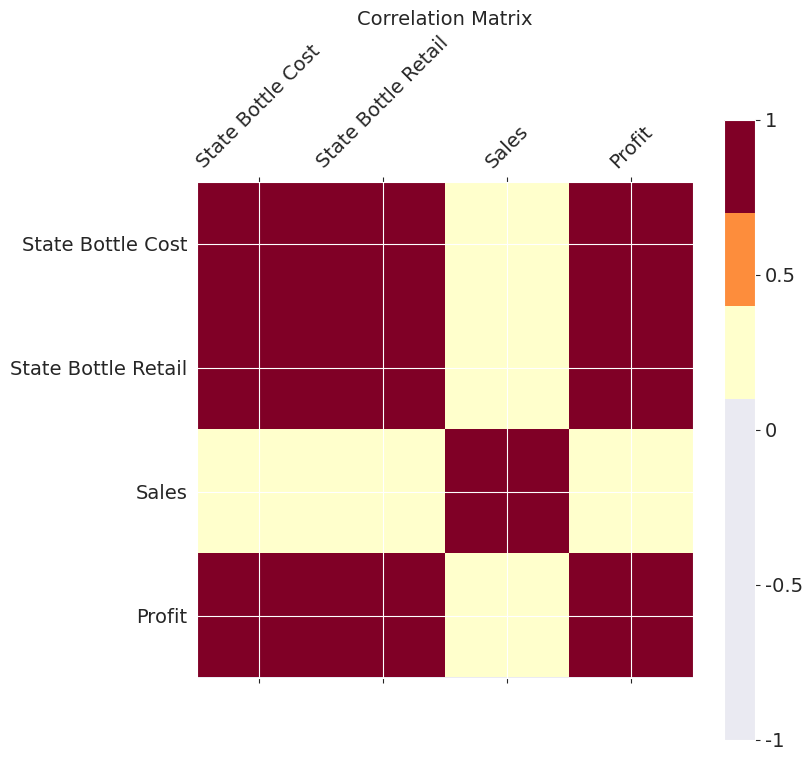

In [64]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_corr = df[['State Bottle Cost', 'State Bottle Retail', 'Sales', 'Profit']].corr()

# Set up the figure
f = plt.figure(figsize=(8, 8))

# Plot the heatmap with specified colors
plt.matshow(df_corr, fignum=f.number, cmap=plt.cm.get_cmap('YlOrRd', 3))  # Use 'YlOrRd' colormap for salmon, yellow, and red

# Add labels and ticks
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)

# Add colorbar with specified colors
cb = plt.colorbar()
cb.set_ticks([-1, -0.5, 0, 0.5, 1])  # Adjust ticks if needed
cb.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
cb.ax.tick_params(labelsize=14)

# Add title
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()


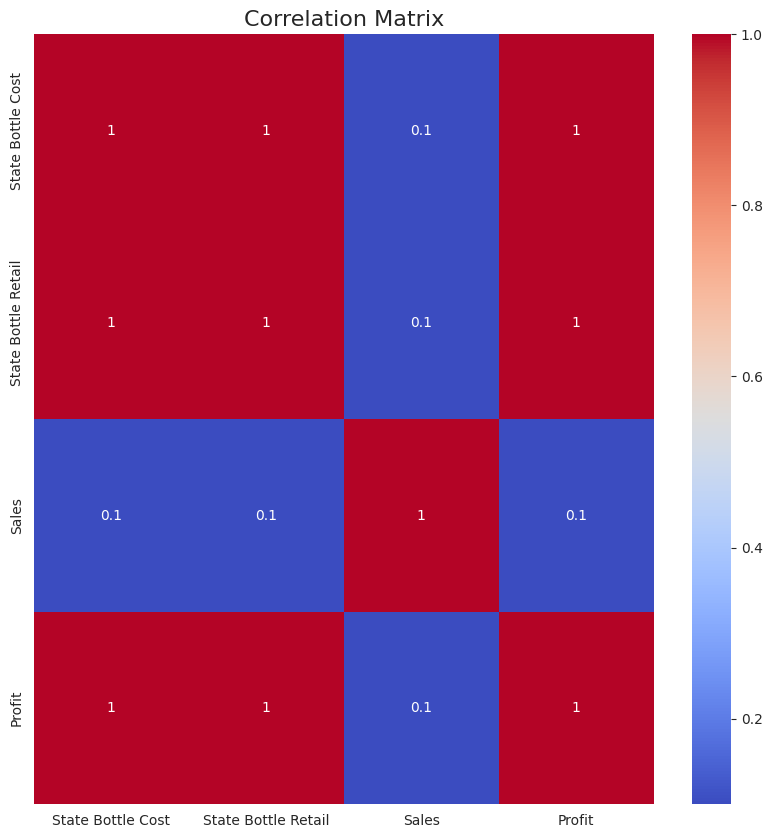

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_corr is your correlation DataFrame
# You may need to replace 'df_corr' with your actual DataFrame name

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df_corr, annot=True, ax=ax, cmap='coolwarm')

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()



# Scatterplots:

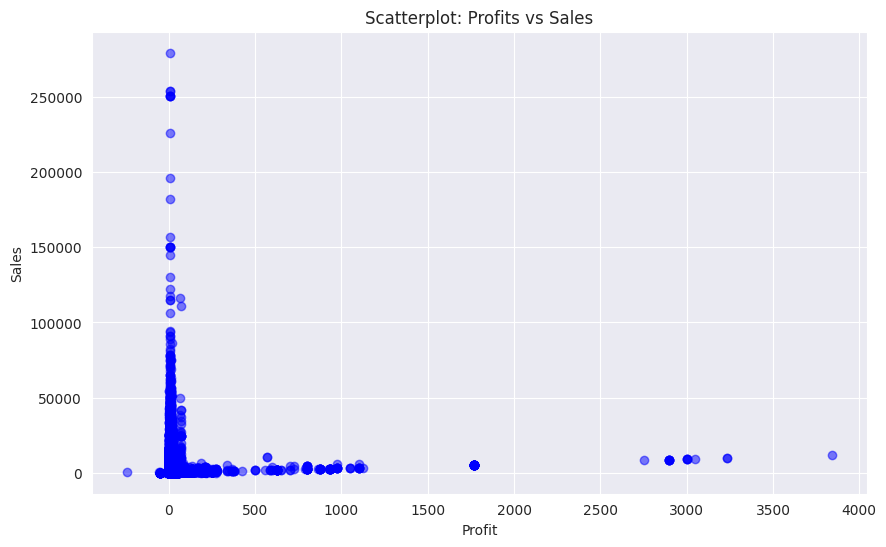

In [54]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Scatterplot for Profits and Sales
plt.scatter(df['Profit'], df['Sales'], alpha=0.5, color='blue')

# Set labels and title
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Scatterplot: Profits vs Sales')

# Show the plot
plt.show()

# Pair Plots of Profit and Sales

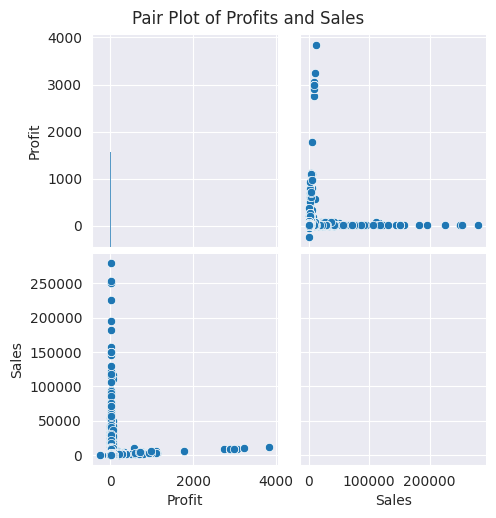

In [55]:
import seaborn as sns

sns.pairplot(df[['Profit', 'Sales']])
plt.suptitle('Pair Plot of Profits and Sales', y=1.02)
plt.show()


#Histogram of Sales
##To visualize the distribution of a single continuous variable.

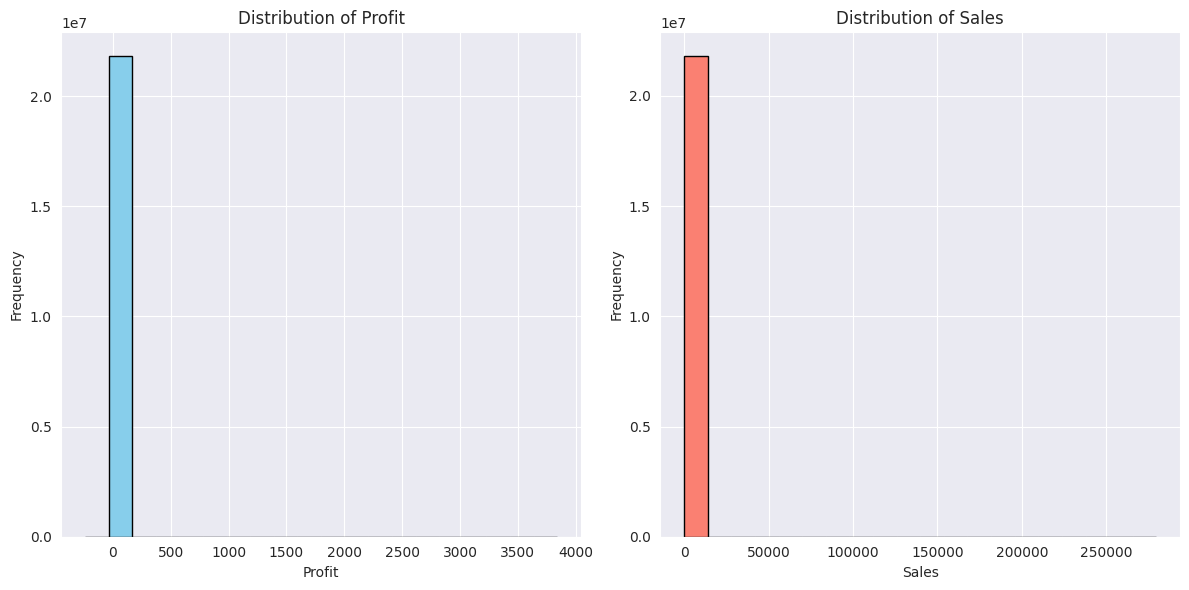

In [57]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Histogram for Profit
plt.subplot(1, 2, 1)
plt.hist(df['Profit'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Histogram for Sales
plt.subplot(1, 2, 2)
plt.hist(df['Sales'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Categorical Plots:

In [58]:
# Value Count
df.category_name.value_counts()

CANADIAN WHISKIES                 2105019
AMERICAN VODKAS                   1935636
STRAIGHT BOURBON WHISKIES         1341329
VODKA 80 PROOF                    1141917
SPICED RUM                        1092901
                                   ...   
IMPORTED GINS                          17
IMPORTED VODKA - CHERRY                14
IMPORTED WHISKIES                      12
AMERICAN WHISKIES                       1
DELISTED / SPECIAL ORDER ITEMS          1
Name: category_name, Length: 103, dtype: int64

## So now we will visualize the distribution of sales by top 10 Category Name

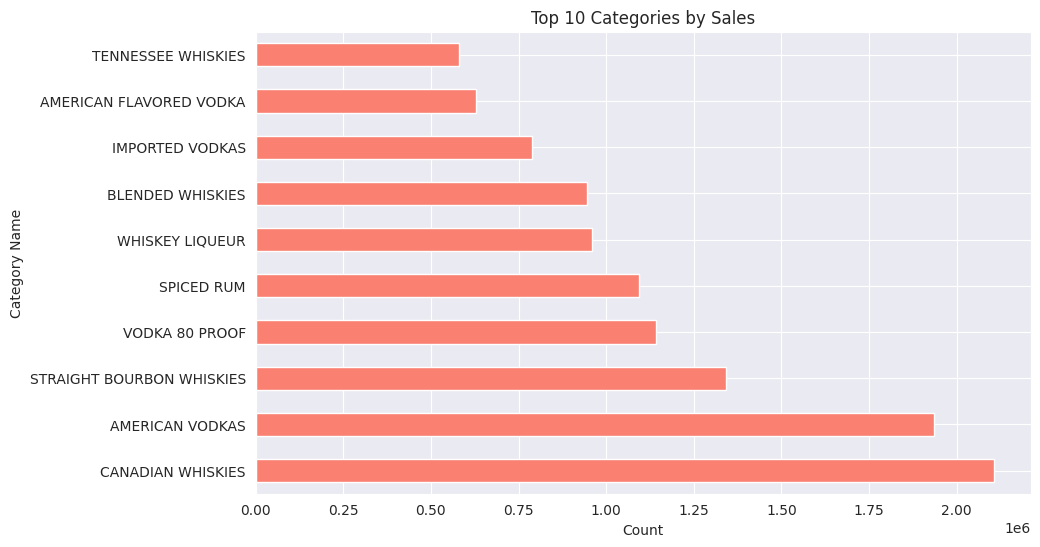

In [63]:
import matplotlib.pyplot as plt

# Sales distribution by top 10 category names
top_categories = df['category_name'].value_counts().head(10)

ax = top_categories.plot(kind='barh', figsize=(10, 6), color='salmon')
ax.set_title('Top 10 Categories by Sales')
ax.set_xlabel('Count')
ax.set_ylabel('Category Name')

plt.show()



#From the above visualization, we can see that Canadian Whiskies and American Vodkas are in the highest of sales

# Sales distribution per Vendor Name

In [65]:
# Value count
df.vendor_name.value_counts()

DIAGEO AMERICAS             3626824
JIM BEAM BRANDS             2033729
SAZERAC COMPANY  INC        1227645
HEAVEN HILL BRANDS          1109234
LUXCO INC                   1009412
                             ...   
CALLISTO SPIRITS COMPANY          1
COUP DE FOUDRE LLC                1
BARON NAHMIAS INC                 1
CHUCKANUT BAY DISTILLERY          1
BULL RUN DISTILLERY LLC           1
Name: vendor_name, Length: 530, dtype: int64

#Top Liquor Brands

1.   Diageo Americas
2.   Jim Beam Brands
3.   Sazerac Company Inc.
4.   Heaven Hill Brands
5.   Luxco Inc.


#Distribution of sales based by top 10 Vendors

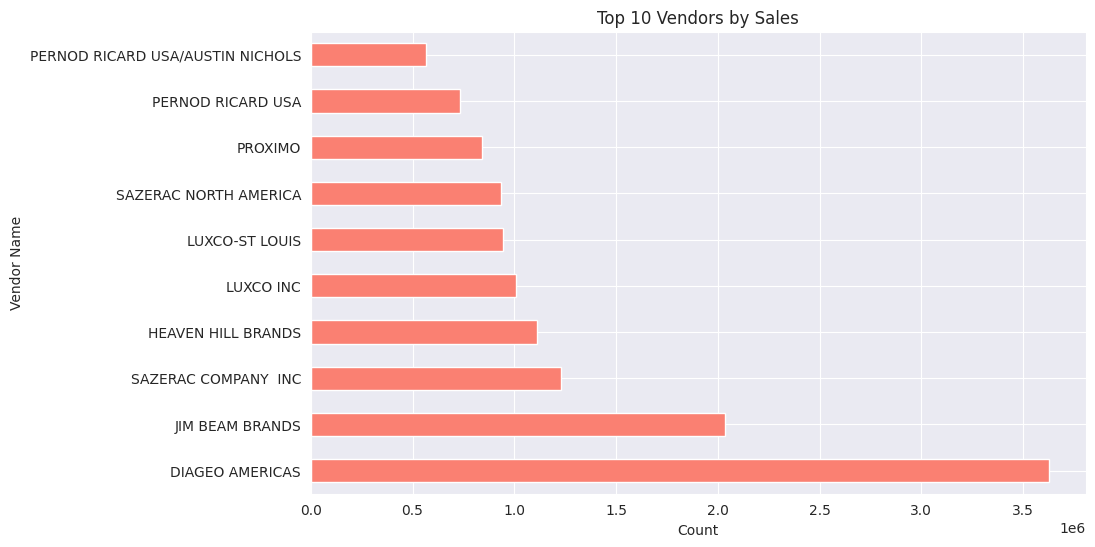

In [66]:
# Sales distribution by top 10 vendors
ax = df['vendor_name'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='salmon')
ax.set_title('Top 10 Vendors by Sales')
ax.set_xlabel('Count')
ax.set_ylabel('Vendor Name')

plt.show()

##We can see that liquor brands from Diageo Americas made the highest sales

# Sales distribution per Item_Description

In [67]:
# Value count
df.item_description.value_counts()

BLACK VELVET                     563051
HAWKEYE VODKA                    487018
FIVE O'CLOCK VODKA               321433
FIREBALL CINNAMON WHISKEY        298691
TITOS HANDMADE VODKA             264116
                                  ...  
KUHL WHIPPED CREME VODKA              1
SARI ZEYBEK                           1
JURA SEVEN WOOD                       1
SMIRNOFF TWIST OF GREEN APPLE         1
BAILEY''S W/2 MUGS                    1
Name: item_description, Length: 10247, dtype: int64

#Top 5 Sales

1. Black Velvet
2. Hawkeye Vodka
3. Five O'Clock Vodka
4. Fireball Cinnamon Whiskey
5. Titos Handmade Vodka

# Distribution of sales by top 10 Items

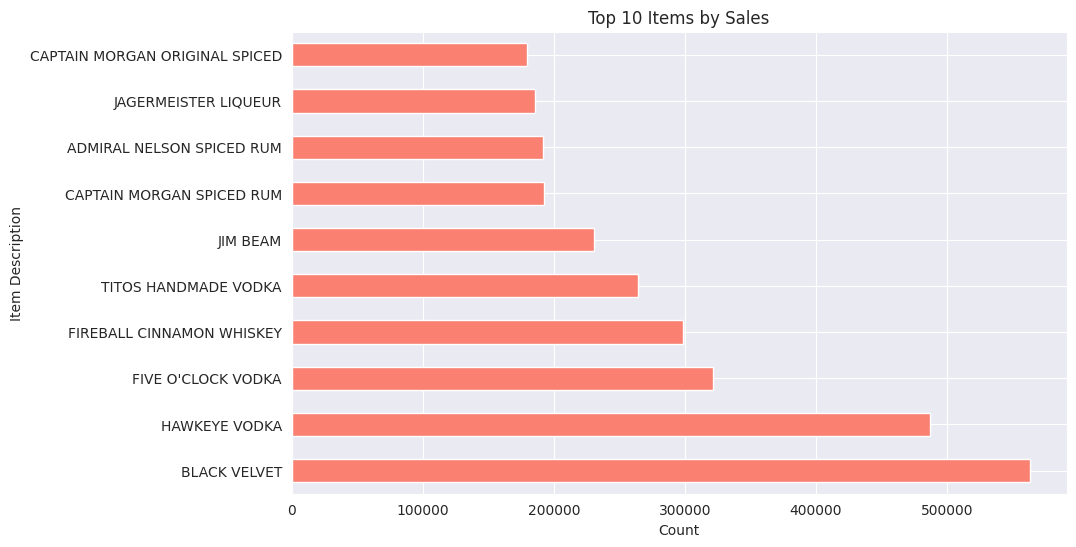

In [68]:
# Sales distribution by top 10 items
ax = df['item_description'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='salmon')
ax.set_title('Top 10 Items by Sales')
ax.set_xlabel('Count')
ax.set_ylabel('Item Description')

plt.show()

## We can see that Black Velvet made the stores the highest sales followed by Hawkeye Vodka.

#The item with the highest profit

In [69]:
# View item with highest profit
df.loc[df['Profit'].idxmax()]

invoice_and_item_number                                 INV-01159600001
date                                                         2016-10-25
store_number                                                       2590
Store Name                          HY-VEE FOOD STORE #5 / CEDAR RAPIDS
address                                            3235 OAKLAND ROAD NE
city                                                       CEDAR RAPIDS
zip_code                                                          52402
store_location                              POINT(-91.658105 42.010971)
County Id                                                            57
county                                                             LINN
category                                                      1011200.0
category_name                                 STRAIGHT BOURBON WHISKIES
vendor_number                                                     125.0
vendor_name                                    CEDAR RIDGE VINEY

#Highest Profit Item:
## Cedar Ridge Reserve Burbon Private Cask DNO

#Item with the Lowest Profit

In [70]:
# View item with the lowest profit
df.loc[df['Profit'].idxmin()]

invoice_and_item_number                      INV-36611800001
date                                              2021-05-13
store_number                                            2515
Store Name                 HY-VEE FOOD STORE #1 / MASON CITY
address                                       2400 4TH ST SW
city                                              MASON CITY
zip_code                                             50401.0
store_location                   POINT(-93.235588 43.148451)
County Id                                                 17
county                                           CERRO GORDO
category                                           1022200.0
category_name                             100% AGAVE TEQUILA
vendor_number                                          330.0
vendor_name                                   GEMINI SPIRITS
item_number                                           989235
item_description             CORAZON REPOSADO BUY THE BARREL
pack                    

#Lowest Profit Item:

## Corazon Reposado Buy the Barrel - 100% Agave Tequila

# The store that made the highest profit

In [80]:
# Convert store name column to string data type
df['Store Name'] = df['Store Name'].astype(str)

# Find the store with the highest profit
highest_profit_row = df.loc[df['Profit'].idxmax()]
highest_profit_store = highest_profit_row['Store Name']
total_profit_for_store = highest_profit_row['Profit']

# Print the results
print(f"The store with the highest profit is: {highest_profit_store}")
print(f"The total profit for this store is: {total_profit_for_store}")


The store with the highest profit is: HY-VEE FOOD STORE #5 / CEDAR RAPIDS
The total profit for this store is: 3840.0


#The Highest Profit Store:


## *   HY-VEE FOOD STORE #5 in Cedar Rapids
## *   Positive gain of $3,840.00



In [79]:
# Convert store name column to string data type
df['Store Name'] = df['Store Name'].astype(str)

# Find the store with the lowest profit
lowest_profit_row = df.loc[df['Profit'].idxmin()]
lowest_profit_store = lowest_profit_row['Store Name']
total_profit_for_store = lowest_profit_row['Profit']

# Print the results
print(f"The store with the lowest profit is: {lowest_profit_store}")
print(f"The total profit for this store is: {total_profit_for_store}")


The store with the lowest profit is: HY-VEE FOOD STORE #1 / MASON CITY
The total profit for this store is: -241.82999999999998


#The Lowest Profit Store:

## *   HY-VEE FOOD STORE #1 in Mason City
## *   Negative loss of $242.00



# Store Location Impact Hypothesis:

The location of a store impacts its profits

#Sales and Profit Correlation Hypothesis:

There is a significant correlation between sales and profit.

#Bottle Volume Impact Hypothesis:

The volume of bottoles sold does not impact profit.

#Bottle Size vs Retail Cost Hypothesis:

The retail cost remains consisten across differnt bottle sizes.



In [86]:
!pip install geopandas shapely pandas


In [92]:
from google.colab import drive
drive.mount('/content/gdrive')


MessageError: ignored

In [91]:
from google.colab import files

# Choose the file to upload
uploaded = files.upload()


KeyboardInterrupt: ignored